OECD API with Python
======

## Example showing GDP growth rates for selected country

-----

*January 12, 2026*<br>
*@bd_econ*

The documentation for the Organization for Economic Cooperation and Development (OECD) API can be found [here](https://data.oecd.org/api/)

In [36]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

## Parameters/ Settings

Finding the parameters can be done using the Data Explorer: https://data-explorer.oecd.org/

Search for the series you are interested in and then click `Developer API`. This will give you the query to retrieve all data and the query to retrieve more information about the structure of the data.

In [37]:
base = 'https://sdmx.oecd.org/public/rest/data/'
param = {'dataset': 'OECD.SDD.NAD,DSD_NAMAIN1@DF_QNA_EXPENDITURE_GROWTH_OECD,1.1',
         'area': 'DEU+USA+CHN',
         'indicators': '.S1..B1GQ......G1.'}
fmt = '?startPeriod=2023-Q1&format=csvfilewithlabels'
url = f'{base}{param["dataset"]}/Q..{param["area"]}{param["indicators"]}{fmt}'

In this example, I retrieve the quarterly real GDP growth rate for Germany, the US, and China. The data come as quarterly growth rates, but I like to annualize the rates, as is the common practice in the US. 

The results can be saved as a csv file. Finally, a chart shows the results.

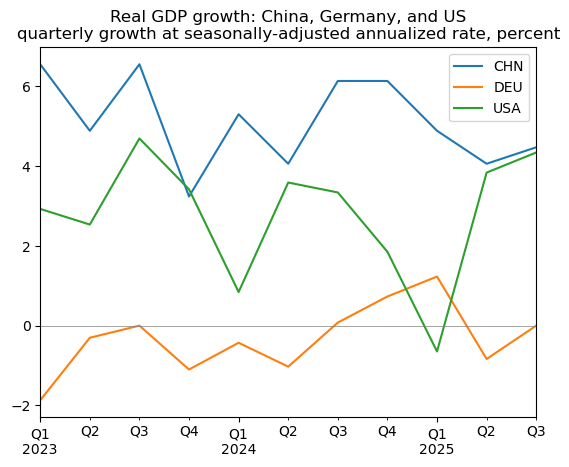

In [38]:
# Request data and read as json
r = requests.get(url)
res = pd.read_csv(io.StringIO(r.text))

# Clean data and save if needed
data = res.set_index(['REF_AREA', 'TIME_PERIOD'])['OBS_VALUE'].unstack().T
data.index = pd.to_datetime(data.index, format='mixed')
data.index.name = ''
data.columns.name = ''
#data.to_csv('filename/csv')

# Annualize data
ann = ((((data / 100) + 1) ** 4) - 1) * 100

# Create chart
title = ('Real GDP growth: China, Germany, and US\n'+
         'quarterly growth at seasonally-adjusted annualized rate, percent')
ann.plot(title=title)
plt.axhline(0, lw=0.5, color='gray')
plt.show();